In [32]:
# DataFrame
import pandas as pd

# Seaborn
import seaborn as sns

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Utility
import re

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

In [33]:
#Importing Datasets
data = pd.read_csv('Datasets/cleaned_data.csv')
data

,Unnamed: 0,album_name,release_date,artist_name,explicit,song_name,lyrics,language,album_total_tracks,duration_ms,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_songs,artist_popularity
0,0,÷ (Deluxe),2017-03-03,ed sheeran,False,Galway Girl,She played the fiddle in an Irish band\nBut sh...,en,0.168539,0.040946,...,1.0,0.171295,0.075069,0.000000,0.332754,0.791490,0.308951,0.75,0.277027,0.845185
1,1,Camila,2018-01-12,camila cabello,False,Havana (feat. Young Thug),"Hey\nHavana, ooh na-na (ay)\nHalf of my heart ...",en,0.112360,0.093116,...,1.0,0.015774,0.187940,0.000039,0.120843,0.381880,0.341004,0.75,0.085135,0.340000
2,2,Unorthodox Jukebox,2012-12-07,bruno mars,False,When I Was Your Man,"Same bed, but it feels just\nA little bit bigg...",en,0.101124,0.089210,...,1.0,0.045545,0.951991,0.000000,0.073028,0.374471,0.136466,0.75,0.139189,0.462222
3,3,Red (Deluxe Edition),2012-10-22,taylor swift,False,We Are Never Ever Getting Back Together,"I remember when we broke up, the first time\nS...",en,0.235955,0.064576,...,1.0,0.152633,0.009767,0.000029,0.088242,0.758679,0.220263,0.75,0.497297,0.537778
4,4,V,2014-09-02,maroon 5,True,Sugar,"I'm hurting baby, I'm broken down\nI need your...",en,0.123596,0.113528,...,1.0,0.023328,0.060360,0.000000,0.071180,0.900508,0.436865,0.75,0.201351,0.473333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,1261,The Pains Of Growing,2018-11-30,alessia cara,False,7 Days,If there's a God\nDo you think he's looking do...,en,0.157303,0.083433,...,0.0,0.366807,0.218584,0.000000,0.156705,0.809483,0.176887,0.75,0.064865,0.080000
1262,1262,MAP OF THE SOUL : PERSONA,2019-04-12,bts,False,Dionysus,Jjuk deurikyeo\nsuljan sippin' paljjang tippin...,en,0.067416,0.128930,...,1.0,0.186847,0.040850,0.000000,0.324060,0.587214,0.792711,0.75,0.367568,0.172593
1263,1263,You Never Walk Alone,2017-02-13,bts,False,Not Today,All the underdogs in the world\nA day may come...,en,0.191011,0.109450,...,1.0,0.229060,0.001841,0.000001,0.980439,0.668713,0.373000,0.75,0.367568,0.172593
1264,1264,The Most Beautiful Moment in Life: Young Forever,2016-05-02,bts,False,I Need U,Fall (everything)\nFall (everything)\nFall (ev...,en,0.247191,0.085562,...,0.0,0.112642,0.018787,0.000000,0.299065,0.644369,0.175369,0.75,0.367568,0.172593


In [34]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   album_name          1266 non-null   object 
 1   release_date        1266 non-null   object 
 2   artist_name         1266 non-null   object 
 3   explicit            1266 non-null   bool   
 4   song_name           1266 non-null   object 
 5   lyrics              1266 non-null   object 
 6   language            1266 non-null   object 
 7   album_total_tracks  1266 non-null   float64
 8   duration_ms         1266 non-null   float64
 9   popularity          1266 non-null   float64
 10  danceability        1266 non-null   float64
 11  energy              1266 non-null   float64
 12  key                 1266 non-null   float64
 13  loudness            1266 non-null   float64
 14  mode                1266 non-null   float64
 15  speechiness         1266 non-null   float64
 16  acoust

## EDA of numerical Variables

In [36]:
# making a new dataset with only numerical data
numer_data = data.select_dtypes(include=['float64','int64'])
numer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   album_total_tracks  1266 non-null   float64
 1   duration_ms         1266 non-null   float64
 2   popularity          1266 non-null   float64
 3   danceability        1266 non-null   float64
 4   energy              1266 non-null   float64
 5   key                 1266 non-null   float64
 6   loudness            1266 non-null   float64
 7   mode                1266 non-null   float64
 8   speechiness         1266 non-null   float64
 9   acousticness        1266 non-null   float64
 10  instrumentalness    1266 non-null   float64
 11  liveness            1266 non-null   float64
 12  valence             1266 non-null   float64
 13  tempo               1266 non-null   float64
 14  time_signature      1266 non-null   float64
 15  artist_songs        1266 non-null   float64
 16  artist

,album_total_tracks,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_songs,artist_popularity
album_total_tracks,1.000000,-0.025872,0.025094,0.030711,0.029902,-0.007721,0.001860,0.017304,0.010423,0.003066,-0.053544,0.031195,0.074048,0.037658,0.037328,0.153822,0.049960
duration_ms,-0.025872,1.000000,0.015386,-0.260231,-0.092755,-0.013615,-0.179850,-0.021867,-0.046888,-0.024682,0.090211,0.031316,-0.309398,0.000301,-0.061390,0.092638,0.033783
popularity,0.025094,0.015386,1.000000,0.063567,0.014472,-0.064446,0.072954,-0.060458,-0.044451,-0.054051,-0.068708,-0.038624,0.042503,-0.019605,0.015239,0.036191,0.126188
danceability,0.030711,-0.260231,0.063567,1.000000,-0.071440,0.037664,0.019441,-0.084126,0.122257,-0.023025,-0.059061,-0.031356,0.482415,-0.212493,0.095204,0.030979,0.064447
energy,0.029902,-0.092755,0.014472,-0.071440,1.000000,0.026348,0.737804,-0.069053,0.095915,-0.669262,-0.063210,0.183846,0.330444,0.212520,0.138632,-0.131779,-0.103979
key,-0.007721,-0.013615,-0.064446,0.037664,0.026348,1.000000,-0.001346,-0.128395,0.004934,-0.017012,0.034482,0.036158,0.066157,-0.000044,-0.034696,0.004730,-0.034104
loudness,0.001860,-0.179850,0.072954,0.019441,0.737804,-0.001346,1.000000,-0.004709,0.043074,-0.579321,-0.183917,0.100073,0.218303,0.137358,0.067758,-0.119208,0.044954
mode,0.017304,-0.021867,-0.060458,-0.084126,-0.069053,-0.128395,-0.004709,1.000000,-0.127028,0.111471,-0.072288,-0.035755,-0.052250,-0.010574,-0.039563,0.054364,0.023938
speechiness,0.010423,-0.046888,-0.044451,0.122257,0.095915,0.004934,0.043074,-0.127028,1.000000,-0.061072,-0.024391,0.151692,0.098090,0.022753,0.040085,-0.030034,-0.010385
acousticness,0.003066,-0.024682,-0.054051,-0.023025,-0.669262,-0.017012,-0.579321,0.111471,-0.061072,1.000000,0.050042,-0.106450,-0.179559,-0.165215,-0.077958,0.057345,0.034372


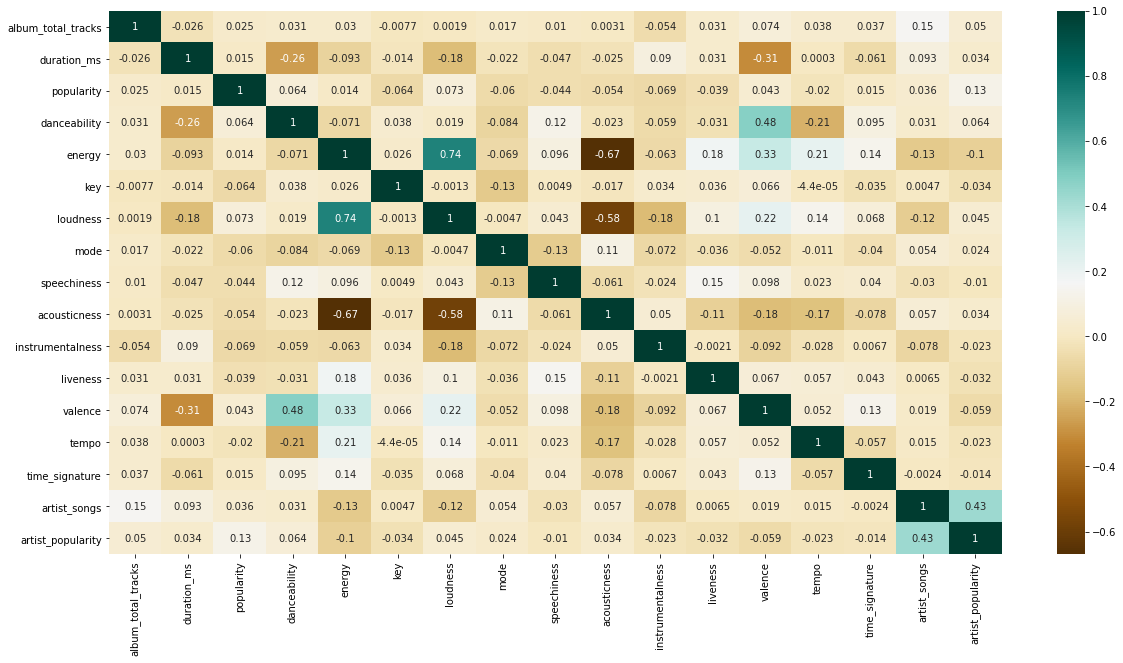

In [37]:
# Plotting the correlation between each variable
plt.figure(figsize=(20,10))
c = numer_data.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

In [38]:
numer_data.describe()

,album_total_tracks,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_songs,artist_popularity
count,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000
mean,0.143369,0.119101,0.642945,0.519195,0.700109,0.478386,0.764818,0.661137,0.088562,0.162206,0.034523,0.173190,0.491468,0.452941,0.740916,0.213343,0.145958
std,0.072614,0.070510,0.195210,0.177179,0.197537,0.324471,0.137699,0.473510,0.126702,0.238282,0.135842,0.153774,0.244296,0.177584,0.058947,0.152874,0.202838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.112360,0.079142,0.559140,0.392344,0.588525,0.181818,0.708634,0.000000,0.023162,0.008365,0.000000,0.079901,0.301439,0.311788,0.750000,0.110811,0.016296
50%,0.134831,0.106787,0.677419,0.525120,0.736153,0.454545,0.794914,1.000000,0.045101,0.055202,0.000008,0.112693,0.481901,0.445856,0.750000,0.162162,0.050000
75%,0.157303,0.141391,0.784946,0.645634,0.854466,0.818182,0.856505,1.000000,0.096312,0.202241,0.001215,0.222995,0.681149,0.564073,0.750000,0.283784,0.164444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

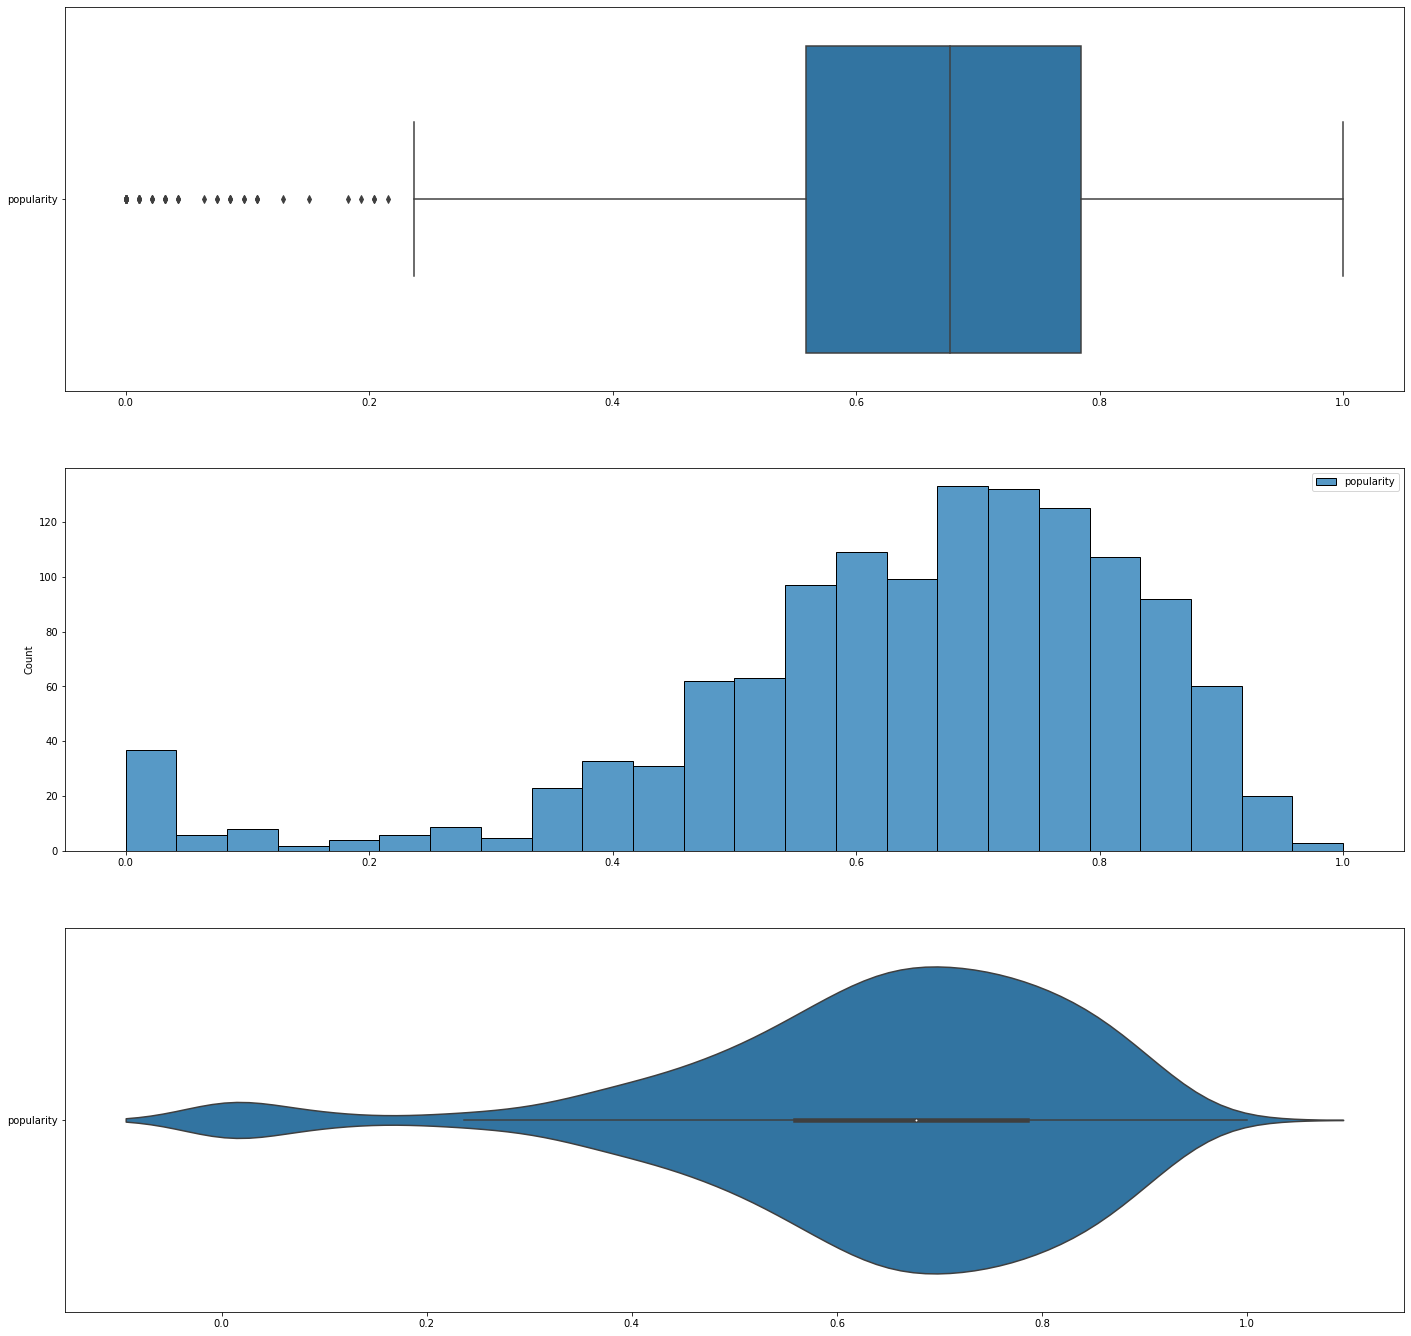

In [39]:
#Predictor variable "popularity"
f, axes = plt.subplots(3, figsize=(24,24))

popularity = pd.DataFrame(numer_data["popularity"])
sns.boxplot(data = popularity, orient='h', ax = axes[0])
sns.histplot(data = popularity, ax = axes[1])
sns.violinplot(data = popularity, orient='h', ax = axes[2])

In [40]:
numer_data["popularity"].describe()

count    1266.000000
mean        0.642945
std         0.195210
min         0.000000
25%         0.559140
50%         0.677419
75%         0.784946
max         1.000000
Name: popularity, dtype: float64

**Popularity has a range of 0.00 to 1.00, with mean of 0.65. 75% of data is spread between 0.56-0.78, and the distribution is left-skewed, with slight increase at the end due to data points with near-zero values. These datas could help us understand what variables make a song unpopular, so we kept them in.**

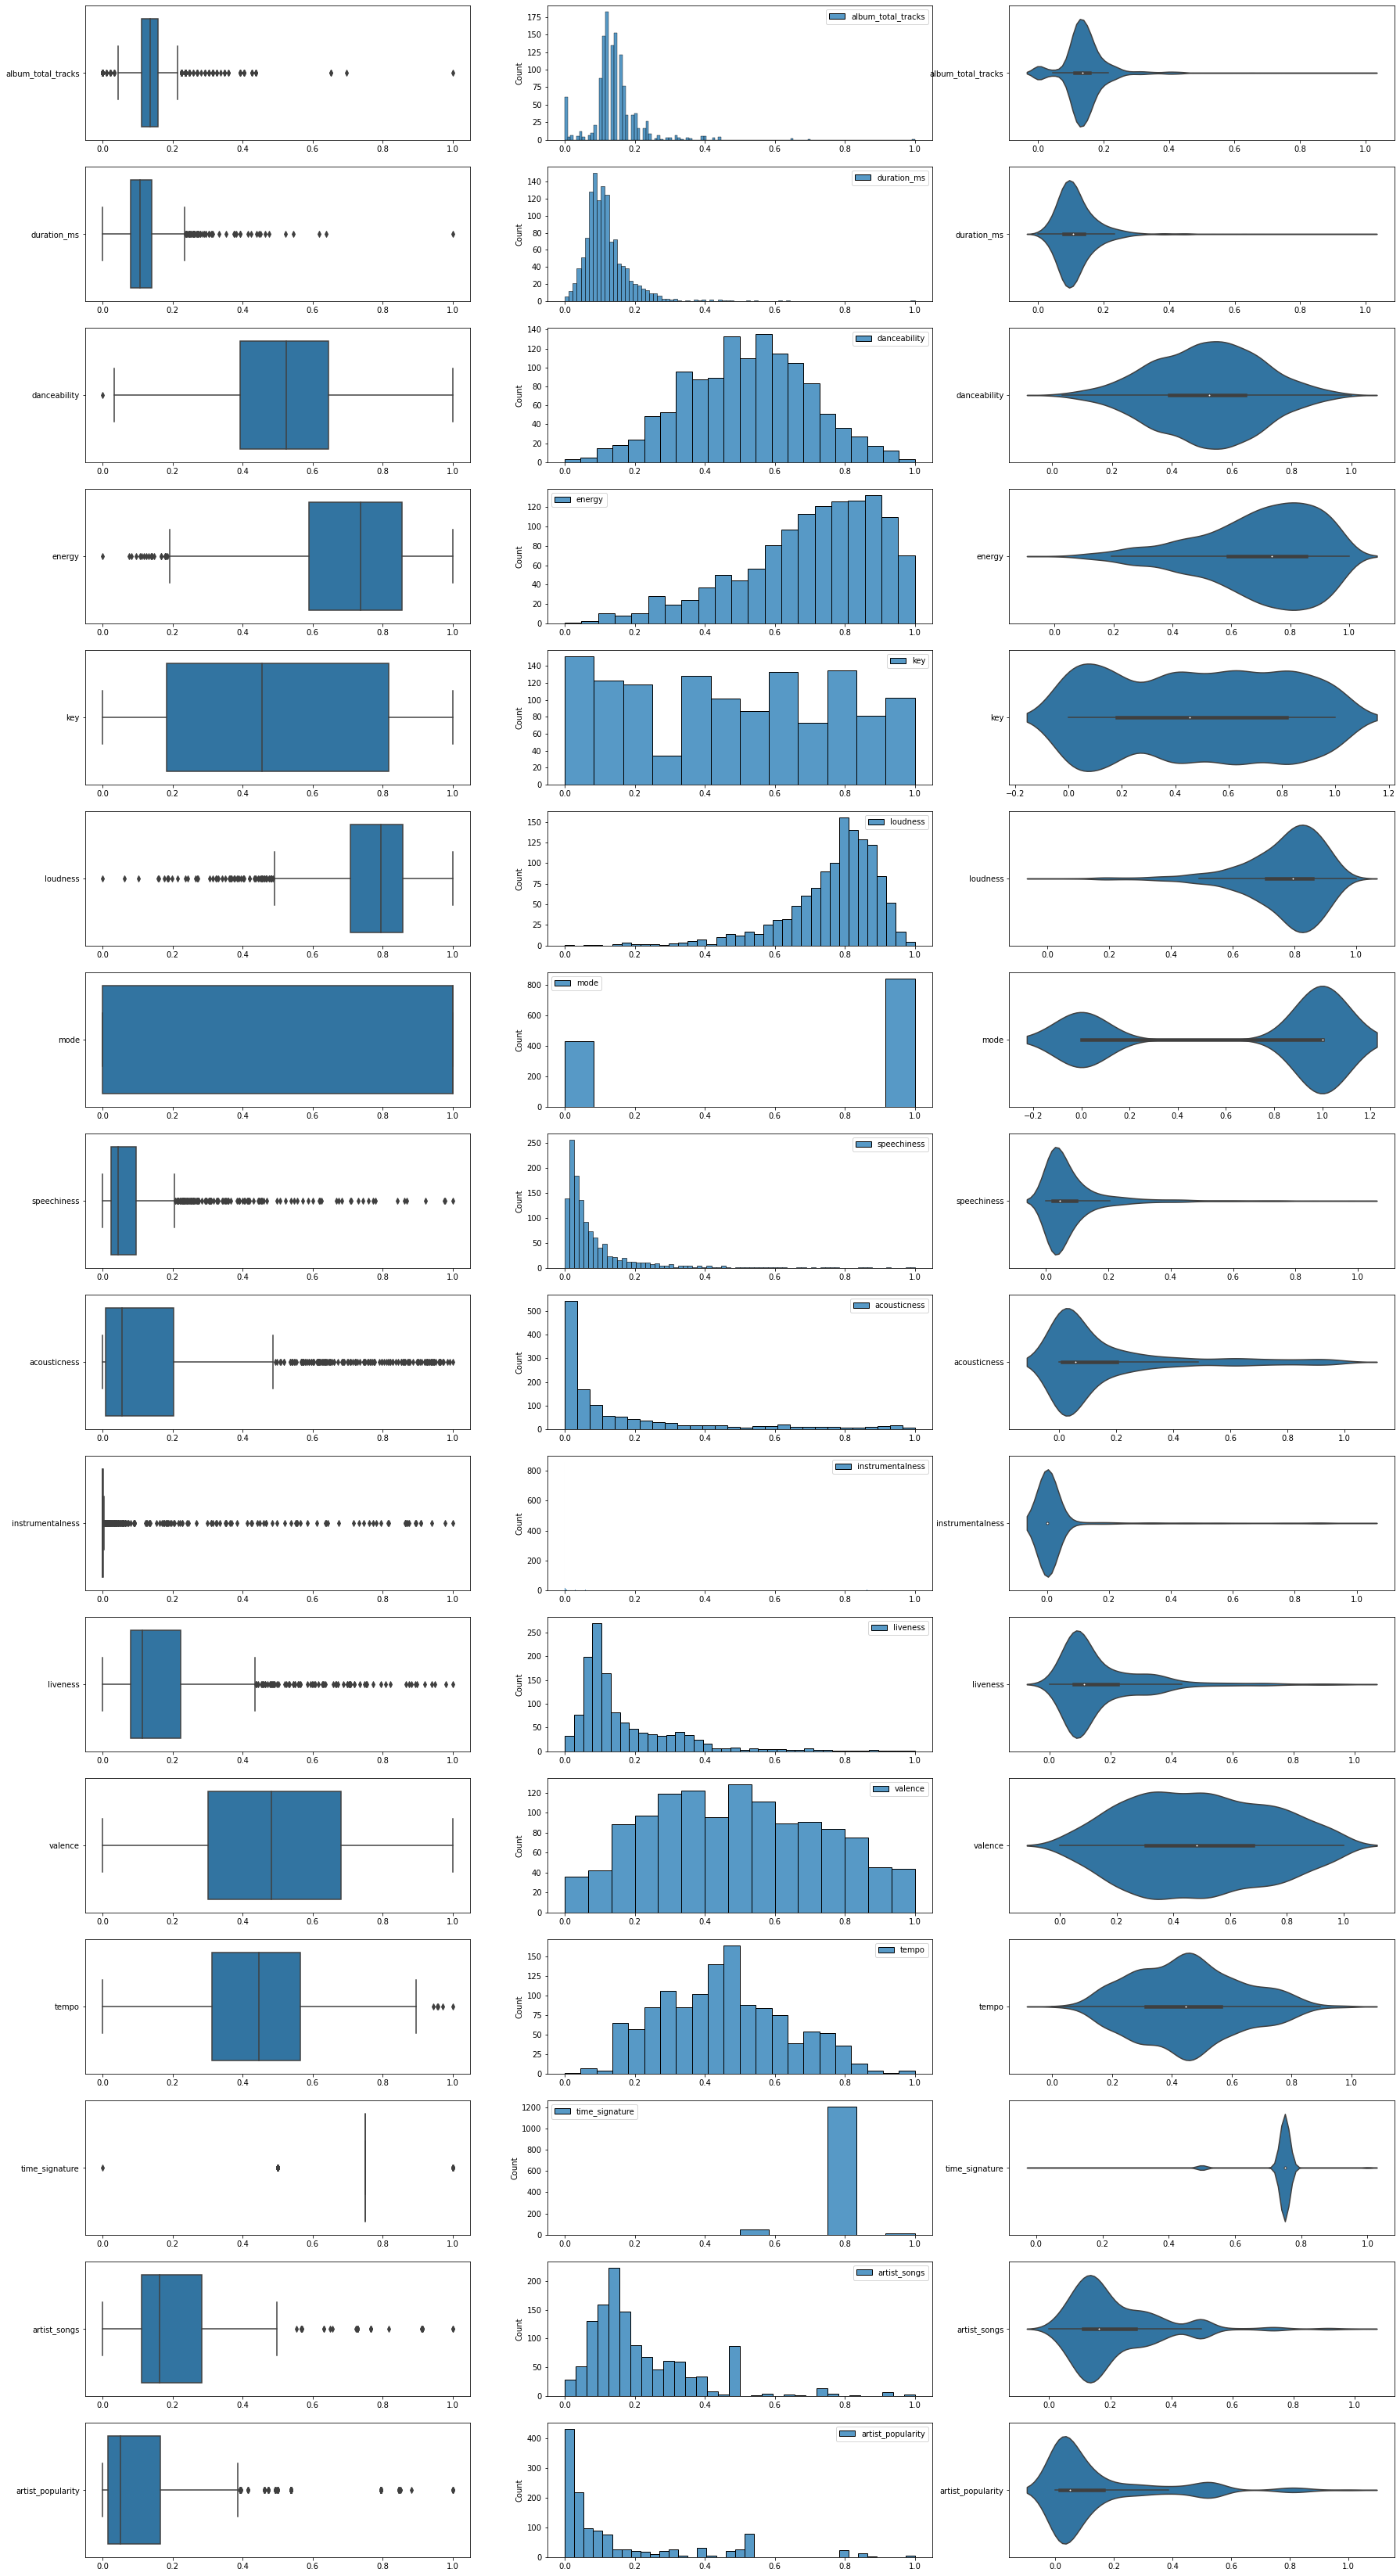

In [41]:
#Numerical response variables
f, axes = plt.subplots(16, 3, figsize=(30, 60))

count = 0
for var in numer_data:
    if var != "popularity": #exclude popularity
        df = pd.DataFrame(numer_data[var])
        sns.boxplot(data = df, orient='h', ax = axes[count,0])
        sns.histplot(data = df, ax = axes[count,1])
        sns.violinplot(data = df, orient='h', ax = axes[count,2])
        count += 1

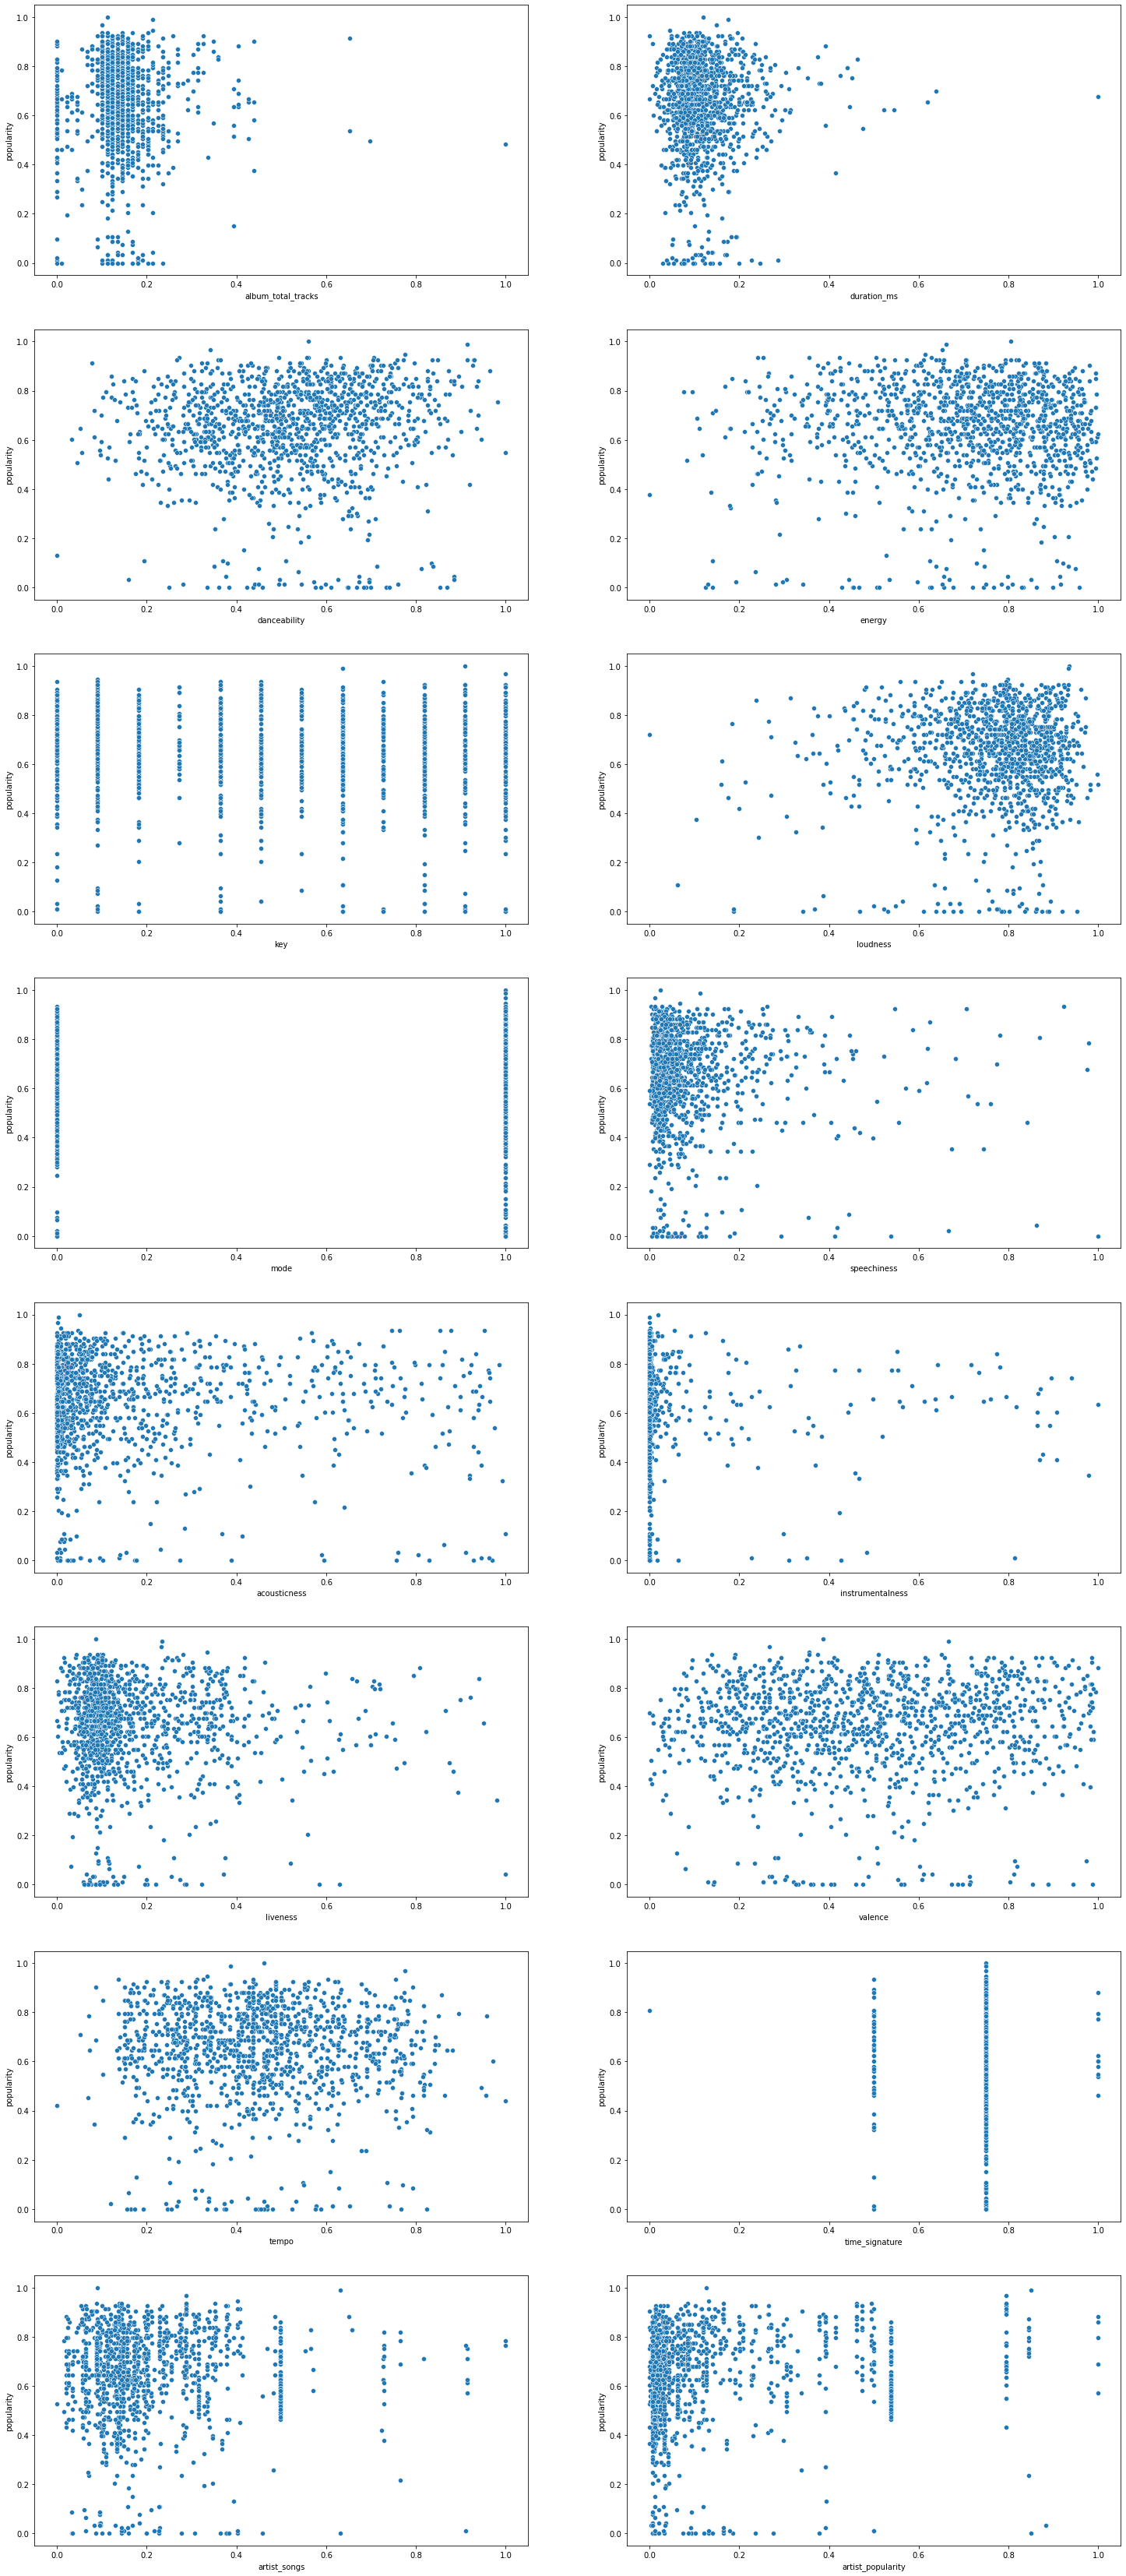

In [42]:
f, axes = plt.subplots(8,2, figsize=(25, 60))
col = 0
row = 0

for var in numer_data:
    if var != "popularity": #exclude popularity
        sns.scatterplot(x = var, y = 'popularity', data = numer_data, ax = axes[col, row])
        row = (row+1) % 2
        if row == 0:
            col += 1

**Plotting a scatterplot of each numerical variable against popularity, most datas seems to be randomly plotted and have no observable patterns.**

**For some scatterplot, we can observe the data spread and slightly observe some patterns. Like artist_popularity in (8,2) it seems that artists with high popularity have mostly popular songs in the datasets. This could mean that either the datasets does not include less popular songs from these artists, or artist popularity have a positive correlation with song popularity.**

**Since there is not much meaningful observation, machine learning techniques will be required to model any relationships between these variables and popularity.**

## EDA of categorical variables

In [43]:
#making a new dataset with only categorical data
categ_data = data.select_dtypes(include=['object','bool'])
categ_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   album_name    1266 non-null   object
 1   release_date  1266 non-null   object
 2   artist_name   1266 non-null   object
 3   explicit      1266 non-null   bool  
 4   song_name     1266 non-null   object
 5   lyrics        1266 non-null   object
 6   language      1266 non-null   object
dtypes: bool(1), object(6)
memory usage: 60.7+ KB


**Language could be a categorical response variable, but we previously dropped all non-english songs to carry out NLP. Thus, 'Explicit' seems to be the only categorical response variable here**

In [44]:
#combining categ variables with popularity
new_data = data[["popularity", "explicit"]]
new_data.head(5)


,popularity,explicit
0,0.870968,False
1,0.903226,False
2,0.935484,False
3,0.591398,False
4,0.903226,True


#### Explicit category EDA

unique values in explicit category: 
[False  True]

False    1154
True      112
Name: explicit, dtype: int64


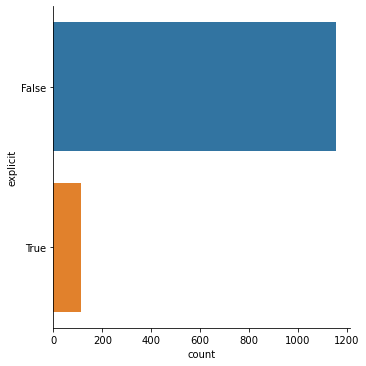

In [45]:
print("unique values in explicit category: ")
print(new_data["explicit"].unique()) # to print categories name only
print()
print(new_data["explicit"].value_counts()) # to print count of every category
sns.catplot(y = 'explicit', data = new_data, kind = "count")

<AxesSubplot:xlabel='popularity', ylabel='explicit'>

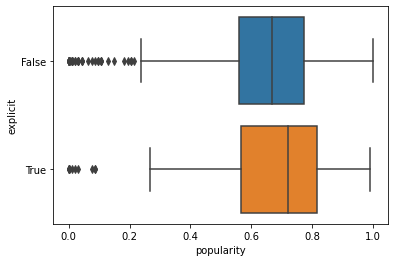

In [46]:
sns.boxplot(x = "popularity", y = "explicit", data = new_data, orient = "h")

<AxesSubplot:xlabel='popularity', ylabel='explicit'>

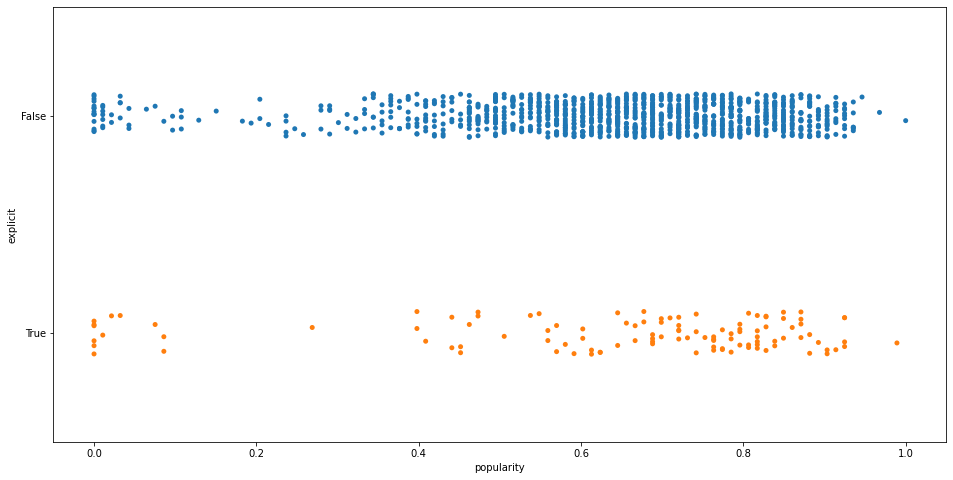

In [47]:
f = plt.figure(figsize=(16, 8))
sns.stripplot(x = 'popularity', y = 'explicit', data = new_data, orient = "h")

**As can be seen from the boxplot and stripplot, it appeared that explicit songs were more likely to be more popular, having a higher mean popularity than non-explicit song, with 75% of the data was spread approximately between 0.8 and 0.55. But the low count of explicit songs compared to non-explicit songs make it difficult to draw conclusions, and a larger dataset will be required for further analysis!**

## EDA of Lyrics

In [48]:
nltk.download('stopwords')
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ctohw\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [49]:
%%time
data.lyrics = data.lyrics.apply(lambda x: preprocess(x)) # preprocessing the text data.

Wall time: 699 ms


<AxesSubplot:>

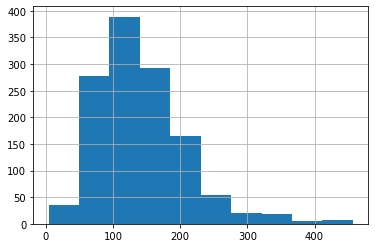

In [50]:
data['len']= data['lyrics'].str.split().map(lambda x: len(x))
data['len'].hist()

Most lyrics are 100-200 words in length

In [51]:
text= ' '.join(t for t in data['lyrics'])
words_list= text.split()

In [52]:
word_freq= {}
for word in set(words_list):
    word_freq[word]= words_list.count(word)
#Creating dataframe of words
df_word= pd.DataFrame(word_freq.items(),columns=['word','count'])

In [53]:
df_word['word_len']= df_word['word'].map(lambda x: len(x))
# sorting values 
df_word=df_word.sort_values('count',ascending=False).reset_index(drop=True)
df_word

,word,count,word_len
0,oh,2838,2
1,know,2521,4
2,like,2508,4
3,love,2347,4
4,yeah,1785,4
...,...,...,...
10954,coincide,1,8
10955,orleans,1,7
10956,pitchforks,1,10
10957,paralysed,1,9


C:\Users\ctohw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='count', ylabel='word'>

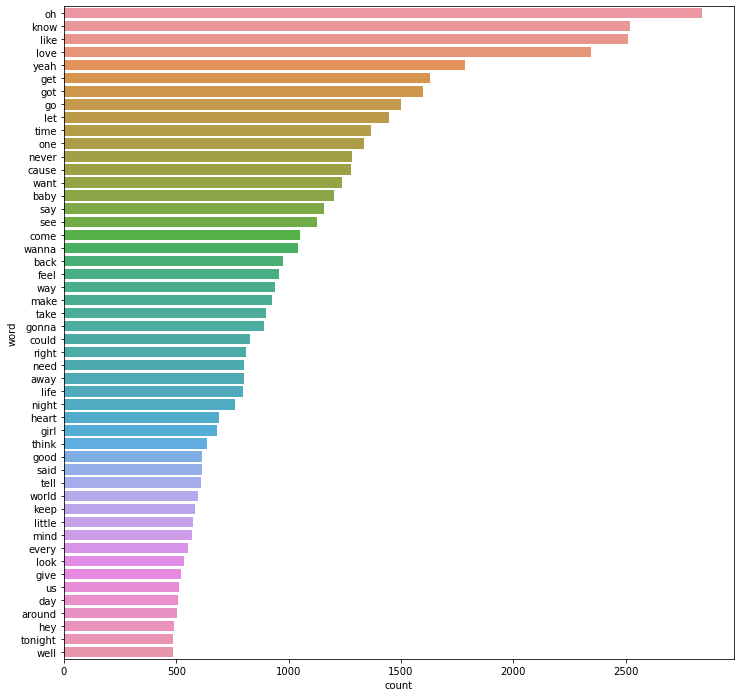

In [54]:
plt.subplots(figsize=(12,12))
df_top= df_word.head(50)
sns.barplot(df_top['count'],df_top['word'])

Most of the common words are linked to emotions of love like "love","feel","girl" and "baby

<AxesSubplot:>

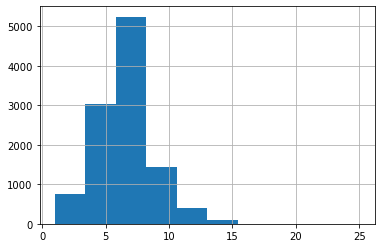

In [55]:
df_word['word_len'].hist()


As seen from the graph above, most words are between 5 and 10 letters